# Libraries

All the functions are implement in ```coutour_extraction_functions.py``` file.

In [1]:
from functions import *
import pandas as pd

# Get contours

In [2]:
_ = process_images_to_json('dataset/binary-masks', 'dataset_contours_aggregate', 'dataset//binary_patchs')

Contours by file extracted and saved to dataset_contours_aggregate_by_image.json
Contours cropped and saved to dataset//binary_patchs.
Contours by file extracted and saved to dataset_contours_aggregate_by_patch.json
Contours by file extracted and saved to dataset_contours_aggregate_by_patch.csv with 376 samples.


# Plot one sample of the dataset

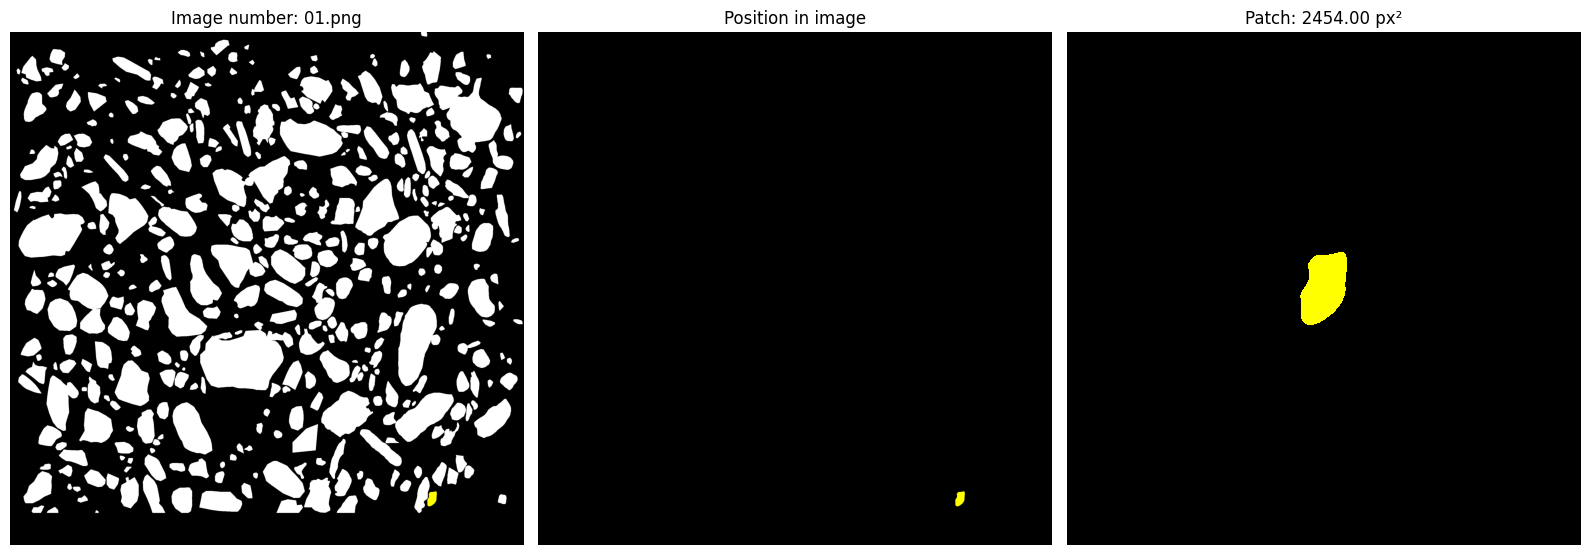

In [7]:
plot_contours_from_json("dataset_contours_aggregate_by_image.json", keys_to_plot=["01.png"]) 

In [4]:
# df = pd.read_csv("contours_dataset.csv")
# df_sorted = df.sort_values(by='qd', ascending=False)
# print(df_sorted)

# Filter contours

In [5]:
filter_images_by_diameter(threshold_diam_mm=15.0)


Images with diameter < 15.0 mm copied to: dataset/binary_patchs_filtered
Total images copied: 376
Total images removed (>= 15.0 mm): 0


# Statistics

In [6]:
df = pd.read_csv("dataset_contours_aggregate_by_patch_filtered.csv")
df

,image_name,area (px),area (mm2),diameter (px),diameter (mm)
0,01_0.png,144.0,0.12960,18.384977,0.551549
1,01_1.png,1020.0,0.91800,55.927624,1.677829
2,01_2.png,1445.0,1.30050,65.551704,1.966551
3,01_3.png,6132.5,5.51925,130.816864,3.924506
4,01_4.png,5463.0,4.91670,123.988098,3.719643
...,...,...,...,...,...
371,01_387.png,1259.5,1.13355,61.611885,1.848357
372,01_388.png,4218.5,3.79665,87.464478,2.623934
373,01_389.png,341.5,0.30735,28.319805,0.849594
374,01_390.png,3532.0,3.17880,94.906059,2.847182


In [8]:
df.describe()

,area (px),area (mm2),diameter (px),diameter (mm)
count,376.000000,376.000000,376.000000,376.000000
mean,5220.292553,4.698263,93.081127,2.792434
std,9440.012451,8.496011,70.932383,2.127971
min,144.000000,0.129600,16.677280,0.500318
25%,749.000000,0.674100,42.178372,1.265351
50%,2131.750000,1.918575,73.027542,2.190826
75%,5308.500000,4.777650,116.327806,3.489834
max,96149.000000,86.534100,465.726135,13.971784
